## Wrangling and Analyze Data




## Table of Contents
- [Introduction](#Introduction)
- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Cleaning](#Cleaning)



<br>
<br>
<br>
<br>
<br>

<a id='intro'></a>
### Introduction

This project aims to wrangle, and visualize the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. throughout this project we will be gathering the data, assessing it, cleaning it and then visualizing it 

<br>

In [83]:
#importing the required library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json

<br>
<br>
<br>

<a id='Gathering'></a>
### Gathering


First we will import the tsv file programetically (image-predictions.tsv)
In the below code we will download the tsv file to the main folder of our project

In [84]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file :
          file.write(response.content)

Second we wil import into pandas for completeing the whole process 


In [85]:
#loading image-predictions.tsv into a dataframe

df_images_original= pd.read_csv('image-predictions.tsv', sep = '\t')

df_images_original.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Now importing the __twitter-archive-enhanced.csv__

In [86]:
#loading twitter-archive-enhanced.csv into data frame
df_twitter_enhanced_original= pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_enhanced_original.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [87]:
#loading the text files into dataframe 

tweets = []
with open('tweet-json.txt') as file:
    for x in file:
        tweet = (json.loads(x))
        tweets.append({'tweet_id' : tweet['id'],
                        'number_retweets' : tweet['retweet_count'],
                        'number_favorite' : tweet['favorite_count'],})
#converting the dictionary to data frame 


df_tweets_original= pd.DataFrame(tweets, columns = ['tweet_id', 'number_retweets', 'number_favorite'])
df_tweets_original.head()

,tweet_id,number_retweets,number_favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [88]:
#making copies of the dataframes 

df_images = df_images_original

df_twitter_enhanced=df_twitter_enhanced_original

df_tweets=df_tweets_original




<a id='Assessing'></a>
### Assessing

it is the time to check through our three datasets which objects needs to be taken care of the prepare it for visualizzation and extract inights 
<br>
<br>

Data frames prepared so far :
>__1.df_images__
>
>__2.df_twitter_enhanced__
>
>__3.df_tweets__
>

In [89]:
#let's check the info for dataframes

df_images.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [91]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
number_retweets    2354 non-null int64
number_favorite    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [92]:
#inspecting sample of the data 
df_images.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True


In [93]:
df_twitter_enhanced.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
450,818646164899774465,NaN,NaN,2017-01-10 02:30:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Seamus. He's very bad a...,8.083449e+17,4.196984e+09,2016-12-12 16:16:49 +0000,"https://vine.co/v/5QWd3LZqXxd,https://vine.co/...",11,10,Seamus,None,None,None,None
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None


In [94]:
df_tweets.sample(2)

,tweet_id,number_retweets,number_favorite
1799,676957860086095872,907,2395
333,832682457690300417,3368,13017


<br>
<br>

<a id='Cleaning'></a>
### Cleaning

Now it is the time to clean the data we will be working the following 


#### Quality issues

>[1](#q1).change the type of timestamp to be datetime
<br>
>[2](#q2).remove unwanted columns and the ones that does have alot of null values
<br>
>[3](#q3).convert a and an to none instead in name column 
<br>
>[4](#q4).change column name in df_images
<br>
>[5](#q5).seperate date and time into two columns
<br>
>[6](#q6).in image-predictions file for dog names it consist of '_' instead of                spaces which we will replace it to make the data more clean 
<br>
>[7](#q7).twitter-archive enhanced data frame in the expanded urls theres some rows has two links which we will delete the second one 
<br>
>[8](#q8).delete the '<a href=' from source column 


### Tideness 

>[1](#t1).dog calssifications must be one column with three variables 
<br>
>[2](#t2).Combine three different dataframes into one master data set

### Quality Issues

<a id='q1'></a>
1.change the type of timestamp type to be datetime 


In [95]:
#Code

#changing the type of timestamp
df_twitter_enhanced.timestamp= df_twitter_enhanced.timestamp.astype('datetime64');

In [96]:
#Testing
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

<a id='q2'></a>
2.Remove unwanted columns and the ones that does have alot of null values

In [97]:
#code 

#unwanted columns with missing values 
columns = ['in_reply_to_status_id','in_reply_to_user_id',
           'retweeted_status_id','retweeted_status_user_id',
           'retweeted_status_timestamp']

#dropping the columns
df_twitter_enhanced.drop(columns = columns , axis = 1 , inplace = True)


In [98]:
#test 
df_twitter_enhanced.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<a id='q3'></a>

3.convert a and an to none instead in name column

In [99]:
#let's check about unuique vlaues number in name column 
df_twitter_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Bailey        7
Buddy         7
Toby          7
an            7
Leo           6
Jack          6
Koda          6
Milo          6
Dave          6
Scout         6
Oscar         6
Rusty         6
Jax           6
Bella         6
Stanley       6
Bentley       5
           ... 
Norman        1
River         1
Florence      1
Fletcher      1
Wafer         1
Chloe         1
O             1
Cuddles       1
Sobe          1
Mollie        1
Craig         1
light         1
Samsom        1
Tiger         1
Sully         1
Malikai       1
Asher         1
Brutus        1
Ricky         1
Chadrick      1
Claude        1
Pherb         1
Ralphy        1
Kobe          1
Cal           1
Noosh         1
Taz           1
Cannon        1
Jazz          1
Alfy          1
Name: name, Length: 957,

In [100]:
#replaceing 'a' and 'an'to none 

df_twitter_enhanced['name'].replace('a','None', inplace = True)
df_twitter_enhanced['name'].replace('an','None', inplace = True)

In [101]:
#Testing 

df_twitter_enhanced.name.value_counts()

None        807
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Bailey        7
Daisy         7
Toby          7
Oscar         6
Bella         6
Leo           6
Jack          6
Jax           6
Stanley       6
Koda          6
Rusty         6
Scout         6
Milo          6
Dave          6
Sammy         5
Alfie         5
Phil          5
           ... 
Norman        1
River         1
Florence      1
Fletcher      1
Wafer         1
Chloe         1
Ester         1
Mollie        1
Ricky         1
Craig         1
light         1
Samsom        1
Tiger         1
Sully         1
Malikai       1
Asher         1
Brutus        1
Sobe          1
Claude        1
O             1
Pherb         1
Ralphy        1
Kobe          1
Cal           1
Noosh         1
Taz           1
Cannon        1
Jazz          1
Chadrick      1
Alfy          1
Name: name, Length: 955,

<a id='q4'></a>

4.change coulmn name in df_images

In [102]:
df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [103]:
#code

# p1 prediction of golden retriever
# p1_conf  prediction confident 1 
# result for prediction 1
# p2 prediction of Labrador retriever
# p2_conf prediction confident 2
# result for prediction 2 

df_images.rename(columns = {'p1':'prediction_of_golden_retriever',
                            'p1_conf':'prediction_confident_1',
                            'p1_dog':'result_for_prediction_1',
                            'p2':'prediction_of_Labrador_retriever',
                            'p2_conf':'prediction_confident_2'},
                              inplace = True)

In [104]:
#testing 

df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_of_golden_retriever',
       'prediction_confident_1', 'result_for_prediction_1',
       'prediction_of_Labrador_retriever', 'prediction_confident_2', 'p2_dog',
       'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

<a id='q5'></a>

5.seperate date and time into two columns

In [105]:
#code

df_twitter_enhanced['timestamp'] = df_twitter_enhanced['timestamp'].astype('str')

#seperate date and time into two different columns 
df_twitter_enhanced[['date','time']] = df_twitter_enhanced['timestamp'].str.split(' ',expand = True)

#drop timestamp column
df_twitter_enhanced.drop('timestamp', axis = 1, inplace = True);

In [106]:
#Test

df_twitter_enhanced.sample(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
690,787397959788929025,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,None,None,None,None,2016-10-15,21:01:17
1625,684830982659280897,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None,2016-01-06,20:16:44


<a id='q6'></a>

6.in image-predictions file for dog names it consist of '_' instead of spaces which we will replace it to make the data more clean

In [107]:
#code 

#replaceiing _ into space in the below columns 
#1.prediction_of_Labrador_retriever
#2.prediction_of_golden_retriever
#3.p3

df_images['prediction_of_Labrador_retriever'] =df_images['prediction_of_Labrador_retriever'].str.replace("_"," ")
df_images['prediction_of_golden_retriever'] =df_images['prediction_of_golden_retriever'].str.replace("_"," ")
df_images['p3'] =df_images['p3'].str.replace("_"," ")


In [108]:
#test
df_images.sample(2)

,tweet_id,jpg_url,img_num,prediction_of_golden_retriever,prediction_confident_1,result_for_prediction_1,prediction_of_Labrador_retriever,prediction_confident_2,p2_dog,p3,p3_conf,p3_dog
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk terrier,0.129114,True,Pomeranian,0.120822,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian elkhound,0.372202,True,Chesapeake Bay retriever,0.137187,True,malamute,0.071436,True


<a id='q7'></a>

7.twitter-archive enhanced data frame in the expanded urls theres some rows has two links which we will delete the second one

In [109]:
#code 

#remove after ',' in the rows 
df_twitter_enhanced['expanded_urls'] = df_twitter_enhanced['expanded_urls'].str.split(',').str[0]

#replace ',' into space 
df_twitter_enhanced['expanded_urls'] = df_twitter_enhanced['expanded_urls'].str.replace(","," ")

In [110]:
#test 
df_twitter_enhanced['expanded_urls'].head

<bound method NDFrame.head of 0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6             https://gofundme.com/ydvmve-surgery-for-jax
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/stat

<a id='q8'></a>
8.delete the '<a href=' from source column

In [111]:
#code 

#deleting the tags of the url link

df_twitter_enhanced['source'] = df_twitter_enhanced['source'].str[9:-39]

In [112]:
#test 
df_twitter_enhanced

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24
5,891087950875897856,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017-07-29,00:08:17
6,890971913173991426,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,None,None,None,None,2017-07-28,16:27:12
7,890729181411237888,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,2017-07-28,00:22:40
8,890609185150312448,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,16:25:51
9,890240255349198849,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,2017-07-26,15:59:51


### Tideness 


<a id='t1'></a>
1.dog calssifications must be one column with three variables

In [113]:
#coding

df_twitter_enhanced_clean = pd.melt(df_twitter_enhanced,
                                   id_vars= ['tweet_id','source',
                                            'text','expanded_urls','rating_numerator',
                                            'rating_denominator','name','date','time'], value_name = 'Dog species')
df_twitter_enhanced_clean.drop(['variable'], axis=1,inplace= True)

In [114]:
#test

df_twitter_enhanced_clean.sample(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,Dog species
1248,711363825979756544,http://twitter.com/download/iphone,"""Please, no puparazzi"" 11/10 https://t.co/nJIX...",https://twitter.com/dog_rates/status/711363825...,11,10,None,2016-03-20,01:28:47,None
7433,829011960981237760,http://twitter.com/download/iphone,This is Dexter. He was reunited with his mom y...,https://twitter.com/dog_rates/status/829011960...,13,10,Dexter,2017-02-07,17:00:28,None


<a id='t2'></a>

2.Combine three different dataframes into one master data set

In [115]:
#coding

twitter_archive_master = pd.merge(df_twitter_enhanced_clean,df_images, how = 'inner',
                                 on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master,df_tweets, how = 'inner',
                                 on = 'tweet_id') 

In [116]:
#test 
twitter_archive_master.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,Dog species,...,prediction_confident_1,result_for_prediction_1,prediction_of_Labrador_retriever,prediction_confident_2,p2_dog,p3,p3_conf,p3_dog,number_retweets,number_favorite
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
2,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
3,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
4,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


In [117]:
#soring the master data frame into csv 

twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Case study: what is the most likley dog names that most of the dogs have?

Text(0,0.5,'number of dogs')

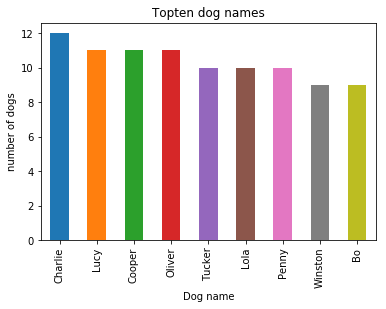

In [118]:
#let's first check the number of each name through our data base 

Topten = df_twitter_enhanced.name.value_counts()[1:10]

Topten.plot(kind = 'bar')
plt.title('Topten dog names')
plt.xlabel('Dog name')
plt.ylabel('number of dogs')


### Conclusion 

1.through our data frames it will help us predict the breed of the dog
<br>
2.using the above visualization we found out that the most likley name for the dogs is charlie
<br>
3.using the rating system (numerator and the dumenator) we like predict which dog breed will is most likely 